<a href="https://colab.research.google.com/github/oownus1/AutoML/blob/main/Pycaret_%ED%9A%8C%EA%B7%80_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyCaret 설치

In [ ]:
!pip install -U Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 14.2 MB/s 
     |████████████████████████████████| 6.8 MB 54.4 MB/s 
     |████████████████████████████████| 167 kB 77.3 MB/s 
     |████████████████████████████████| 10.4 MB 54.3 MB/s 
     |████████████████████████████████| 88 kB 8.2 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 262 kB 61.8 MB/s 
     |████████████████████████████████| 2.0 MB 63.8 MB/s 
     |████████████████████████████████| 3.3 MB 74.4 MB/s 
     |████████████████████████████████| 1.3 MB 72.3 MB/s 
     |████████████████████████████████| 1.7 MB 54.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 134 kB 60.3 MB/s 
     |████████████████████████████████|

Google Colab 사용자의 경우 다음의 코드를 실행합니다.

In [ ]:
from pycaret.utils import enable_colab

enable_colab()

Colab mode enabled.


## 필요한 모듈 import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.options.display.max_columns = None

## 실습을 위한 데이터셋 로드

In [ ]:
from pycaret.datasets import get_data #알아서 문자열과 결측치를 관리해준다
dataset = get_data('diamond')   #다이아몬드 가격 데이터셋 
# 컬럼들을 토대로 다이아몬드 가격이 얼마나 나가는지 알 수 있다
# 다이아몬드의 특성값들임을 알 수 있다

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [ ]:
# 데이터셋 크기 출력
dataset.shape

(6000, 8)

In [ ]:
#머신러닝의 학습할 데이터셋은 4800개, 예측할 데이터는 1200개로 나누어준 부분이다.
train = dataset.sample(frac=0.8, random_state=123)
test = dataset.drop(train.index)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)
print('학습용 데이터셋: ' + str(train.shape))
print('예측용 데이터셋: ' + str(test.shape)) 

학습용 데이터셋: (4800, 8)
예측용 데이터셋: (1200, 8)


## 1-1) 셋업 setup

머신러닝 예측 방식에 따라 다음 중 하나를 골라 import 합니다.

In [ ]:
# from pycaret.classification import *  # 분류
from pycaret.regression import *        # 회귀
# from pycaret.clustering import *      # 군집
# from pycaret.anomaly import *         # 이상 탐지
# from pycaret.arules import *          # 연관 규칙

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


**`setup` 함수**

- `data`: 학습할 데이터셋을 지정합니다.
- `target`: 예측할 대상(target) 컬럼을 지정합니다.
- `session_id`: SEED 값을 지정합니다.

- `profile`: True로 설정시 데이터 프로파일링을 출력합니다.

In [ ]:
# 맨 끝 Price가 우리가 맞추어야할 데이터이고 나머지 컬럼이 학습할 데이터이다.
train.head(1)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,0.75,Ideal,G,VVS2,EX,EX,GIA,3879


In [ ]:
# data에는 학습할 데이터셋, 우리가 예측할 데이터를 target에 넣어주고, session_id는 아무거나 넣어주어도 된다.
clf = setup(data=train, 
            target='Price', 
            session_id=123, 
            silent=True, # 얘를 지우고 실행 시 발견할 각 컬럼의 타입만을 알려준다. 
            ) 
#학습할 준비단계

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(4800, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3359, 28)"


## 1-2) 고급 데이터 전처리

[문서 링크](https://pycaret.readthedocs.io/en/latest/api/classification.html)

In [ ]:
#데이터의 전처리가 굉장히 중요하다
#전처리가 어떻게 진행되는지에 따라 데이터 모델링의 결과가 달라질 수 있기 때문에 데이터 전처리 과정이 굉장히 중요하다

### `combine_rare_levels` / `rare_level_threshold`

- `combine_rare_levels`는 범주형 컬럼 중 희소 값을 가지는 value에 대하여 합쳐 주는 역할을 수행합니다.
- `rare_level_threshold`는 N%의 값에 대하여 combine(병합) 하는 작업을 허용하는 허용치를 입력합니다.

In [ ]:
# Clarity의 FL 값은 다른 컬럼과 합쳐지게 됩니다.
train['Clarity'].value_counts()
#FL 4개 밖에 없는 값을 처리하려다가 일반화가 잘 안될 수 있어 성능 다운 결과를 초래할 수 있다. 
#처리법 : 여기있는 4개를 가지고있는 행을 없애주거나, 변경, 합침시킬 수 있다. 
#이를 직접하지 않고 combine_rare_levels를 True로 주게되면 알아서 희소한 값들을 처리해준다. 
#희소한 값의 기준은 rare_level_threshold에서 지정해 줄 수 있다. 
# 즉 둘은 짝

SI1     1654
VS2     1283
VS1      908
VVS2     543
VVS1     228
IF       180
FL         4
Name: Clarity, dtype: int64

In [ ]:
clf = setup(data=train, 
            target='Price', 
            session_id=123, 
            combine_rare_levels=True, #희소한 값들을 알아서 처리해준다
            rare_level_threshold=0.05, #희소한 값들의 기준 지정can
            silent=True,
            ) 

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(4800, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3359, 28)"


### `remove_multicollinearity` / `multicollinearity_threshold`

다중 공선성 문제가 발생할 수 있는 컬럼을 제거합니다.

In [ ]:
clf = setup(data=train, 
            target='Price', 
            session_id=123, 
            combine_rare_levels=True,           # 희소 level 병합 적용 여부
            rare_level_threshold=0.05,          # 희소 level 임계치
            remove_multicollinearity=True,      # collinearity 제거
            multicollinearity_threshold = 0.95, # collinearity 제거 임계치
            silent=True,
            ) 

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(4800, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3359, 27)"


### `bin_numeric_features`

**binning**을 적용할 컬럼을 선택합니다.

In [ ]:
#binning은 숫자형 데이터를 범주화 시키는 작업을 의미 -> 구간을 나눠준다
clf = setup(data=train, 
            target='Price', 
            session_id=123, 
            combine_rare_levels=True,             # 희소 level 병합 적용 여부
            rare_level_threshold=0.05,            # 희소 level 임계치
            remove_multicollinearity=True,        # collinearity 제거
            multicollinearity_threshold=0.95,     # collinearity 제거 임계치
            bin_numeric_features=['Carat Weight'],
            silent=True,
            ) 

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(4800, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3359, 39)"


### `transformation` / `transform_target`

In [ ]:
clf = setup(data=train, 
            target='Price', 
            session_id=123, 
            combine_rare_levels=True,             # 희소 level 병합 적용 여부
            rare_level_threshold=0.05,            # 희소 level 임계치
            remove_multicollinearity=True,        # collinearity 제거
            multicollinearity_threshold=0.95,     # collinearity 제거 임계치
            bin_numeric_features=['Carat Weight'],
            normalize=True,            # normalize, transformation, trainform_target은 스케일을 측정해준다.
            transformation=True, 
            transform_target=True, 
            silent=True,
            ) 

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(4800, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3359, 39)"


## 2-1) 모든 모델에 대한 학습 compare_models

`compare_models`
- `sort`: 정렬 기준이 되는 평가지표를 설정합니다.
- `n_select`: 상위 N개의 알고리즘을 선택합니다.
- `fold`: Cross Validation 평가 Fold의 개수를 지정합니다.
- `round`: 결과를 소수 N째자리 까지 반올림하여 표기합니다.

In [ ]:
#학습 수행 -> 학습해서 결과를 알려주는 부분
best_models = compare_models(n_select=3, fold=5, round=2)
#지표들 확인해 볼 수 있다
#MAE, MSE, RMSE는 평가지표 -> MAE<MSE 이며, MSE의 루트 -> RMSE(오차의 제곱이면 과장되기때문에 루트를 씌워주는 것)
#MAE는 결과값과 정답의 차이를 구하는 것 / MSE는 차이의 제곱
#R2 : 0~1 사이의 값중 1에 가까울수록 학습이 잘된것을 의미
#즉 지표의 E는 Error를 의미 -> 작으면 작을수록 좋다
#결론:다이아몬드 가격예측 모델을 돌려봤더니 huber가 가장 성능이 좋았더라(MAE가 가장 작은)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,977.70,3.665284e+06,1909.78,0.97,0.10,0.07,0.56
ridge,Ridge Regression,976.27,3.587806e+06,1886.61,0.97,0.10,0.07,0.02
br,Bayesian Ridge,974.39,3.634764e+06,1901.08,0.97,0.10,0.07,0.02
huber,Huber Regressor,972.12,3.565552e+06,1884.90,0.97,0.10,0.07,0.08
rf,Random Forest Regressor,880.53,3.644070e+06,1873.64,0.97,0.09,0.07,0.46
lightgbm,Light Gradient Boosting Machine,832.32,3.830412e+06,1935.25,0.96,0.08,0.06,0.10
lar,Least Angle Regression,998.80,4.411521e+06,2062.43,0.96,0.10,0.07,0.02
et,Extra Trees Regressor,1016.81,5.094880e+06,2171.73,0.95,0.11,0.08,0.53
gbr,Gradient Boosting Regressor,1134.88,5.215939e+06,2264.13,0.95,0.11,0.08,0.15
dt,Decision Tree Regressor,1053.18,6.181890e+06,2371.42,0.94,0.11,0.08,0.02


### 모델 블렌딩 blend_models

- `compare_models`로 추출된 best 모델에 대하여 모델 블렌딩하여 성능 개선
- `Soft` voting 방식으로 `estimator_list`에 적용된 모델을 앙상블
- `Voting Ensemble`

In [ ]:
#여러개의 모델들을 알아서 조합하여 학습 진행 for 성능 개선
#결과 : 평균으로 974정도 차이나는 모델을 만들었다
blended_models = blend_models(best_models, fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,924.6618,3.267930e+06,1807.7418,0.9683,0.0973,0.0713
1,1030.1034,4.189986e+06,2046.9455,0.9647,0.1001,0.0706
2,988.1652,4.219527e+06,2054.1486,0.9577,0.0997,0.0741
3,938.1695,3.358272e+06,1832.5589,0.9684,0.0903,0.0699
4,991.0396,2.891983e+06,1700.5832,0.9732,0.0974,0.0737
Mean,974.4279,3.585540e+06,1888.3956,0.9664,0.0970,0.0719
Std,38.3556,5.293092e+05,139.6484,0.0051,0.0035,0.0017


## 2-2) 단일 모델 생성 create_model / 배깅 앙상블 ensemble_

단일 모델을 생성하기 위해서는 `create_model`로 생성할 수 있습니다.

단일 모델 리스트

- `lr`: Linear Regression
- `lasso`: Lasso Regression
- `ridge`: Ridge Regression
- `en`: Elastic Net
- `lar`: Least Angle Regression	
- `llar`: Lasso Least Angle Regression
- `omp`: Orthogonal Matching Pursuit	
- `br`: Bayesian Ridge
- `ard`: Automatic Relevance Determination	
- `par`: Passive Aggressive Regressor
- `ransac`: Random Sample Consensus
- `tr`: TheilSen Regressor
- `huber`: Huber Regressor
- `kr`: Kernel Ridge
- `svm`: Support Vector Machine
- `knn`: K Neighbors Regressor	
- **`dt`: Decision Tree**
- **`rf`: Random Forest**
- `et`: Extra Trees Regressor
- `ada`: AdaBoost Regressor
- **`gbr`: Gradient Boosting Regressor**
- `mlp`: Multi Level Perceptron
- **`xgboost`: Extreme Gradient Boosting**
- **`lightgbm`: Light Gradient Boosting**
- **`catboost`: CatBoost Regressor**

In [ ]:
#하나의 단일 알고리즘을 만들어내는 것 

In [ ]:
#결과가 997로 에러가 커져서 아까보다는 성능은 그렇게 좋지 않다.
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,932.7755,2.953955e+06,1718.7075,0.9747,0.1009,0.0756
1,881.7646,2.146809e+06,1465.1994,0.9758,0.1048,0.0793
2,1064.1836,5.157916e+06,2271.1045,0.9521,0.1033,0.0725
3,1220.2593,1.215888e+07,3486.9585,0.9062,0.1177,0.0796
4,863.0735,2.920870e+06,1709.0552,0.9693,0.0997,0.0732
5,974.3289,3.195869e+06,1787.6993,0.9693,0.1046,0.0801
6,941.4979,5.481835e+06,2341.3320,0.9515,0.1012,0.0759
7,1037.5949,5.091162e+06,2256.3603,0.9489,0.1074,0.0785
8,1075.9501,4.529765e+06,2128.3245,0.9599,0.1110,0.0757


### 앙상블 ensemble_model

- [배깅 앙상블](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-2)

- [부스팅 앙상블](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-3)

In [ ]:
#위에서 단일로 했던 것을 앙상블을 하면 이 단일을 여러개로 만들어서 더 정규화된 예측 가능
#앙상블은 단일 모델에서 더 좋게 작동한다.
#앙상블을 하는 방법인 method는 여러개가 있다. 
ensembled_models = ensemble_model(dt, method='Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,809.2682,2.027441e+06,1423.8824,0.9826,0.0871,0.0646
1,782.4865,1.887564e+06,1373.8866,0.9787,0.0928,0.0692
2,930.0156,3.774195e+06,1942.7288,0.9650,0.0943,0.0655
3,1081.9019,8.227744e+06,2868.4044,0.9365,0.1014,0.0718
4,828.9520,3.144118e+06,1773.1661,0.9670,0.0906,0.0657
5,957.2881,4.690835e+06,2165.8336,0.9550,0.0970,0.0729
6,887.7622,4.268082e+06,2065.9336,0.9622,0.0907,0.0686
7,915.6785,3.914043e+06,1978.3940,0.9607,0.0933,0.0694
8,963.5047,3.498392e+06,1870.3988,0.9690,0.0964,0.0682


In [ ]:
#부스팅 앙상블 알고리즘에서는 953이 나왔다 -> 배깅 앙상블이 더 좋았음을 알 수 있다. 
ensembled_models = ensemble_model(dt, method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,816.6000,2.113089e+06,1453.6468,0.9819,0.0904,0.0667
1,873.1060,2.414996e+06,1554.0259,0.9727,0.0990,0.0738
2,1029.5588,5.180448e+06,2276.0599,0.9519,0.1015,0.0695
3,1125.7969,7.666090e+06,2768.7704,0.9409,0.1042,0.0759
4,898.2775,4.147125e+06,2036.4490,0.9564,0.0978,0.0709
5,1007.3739,5.466236e+06,2337.9983,0.9475,0.1023,0.0767
6,921.0531,5.827148e+06,2413.9487,0.9484,0.1011,0.0731
7,974.0054,4.578990e+06,2139.8576,0.9541,0.1023,0.0739
8,996.8832,3.521562e+06,1876.5826,0.9688,0.1021,0.0719


## 3) 튜닝 tune_model

In [ ]:
#성능을 더 끌어올리고 싶어 튜닝을 한다
#lasso라는 모델이 있는데 이를 만든다

lasso = create_model('lasso', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6889.1726,1.132943e+08,10643.9805,-0.1006,0.7376,0.6330
1,6934.4488,1.355138e+08,11641.0388,-0.1417,0.7257,0.5517
2,6525.4807,1.098602e+08,10481.4221,-0.1016,0.7180,0.6073
3,6592.4412,1.169242e+08,10813.1506,-0.0998,0.7198,0.6021
4,7006.3973,1.282692e+08,11325.5999,-0.1899,0.7317,0.5325
Mean,6789.5881,1.207724e+08,10981.0384,-0.1267,0.7266,0.5853
Std,193.1463,9.626179e+06,434.9101,0.0353,0.0073,0.0373


`RandomizedSearchCV`를 활용하여 하이퍼 파라미터를 튜닝합니다.

- `n_iter`에 횟수를 늘리거나 줄여서 시도할 횟수를 지정할 수 있습니다.

In [ ]:
#튜닝을 한다 -> 결과가 1248이 나왔다.
#위의 튜닝하기 전의 결과가 더 좋게 나왔다.
#이런 경우가 있을 수 있다 -> 이때는 튜닝하는 결과가 작아서 그럴수 있기에 n_iter로 횟수를 늘려주면 된다.
#이 횟수를 늘려주게 되면 그만큼 학습하는데 시간이 오래 걸리는 경우가 있다. 
tuned_models = tune_model(dt, fold=5, n_iter=50, round=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1150.08,4319223.42,2078.27,0.96,0.15,0.10
1,1382.92,8685024.09,2947.04,0.93,0.15,0.10
2,1240.21,5805553.05,2409.47,0.94,0.14,0.10
3,1217.82,5747074.51,2397.31,0.95,0.14,0.11
4,1252.93,4478854.22,2116.33,0.96,0.14,0.10
Mean,1248.79,5807145.86,2389.68,0.95,0.14,0.10
Std,75.88,1566145.97,310.74,0.01,0.00,0.00


## 4) 모델 예측 predict_model

- `Label`에 예측된 결과를 확인할 수 있습니다.
- `Score`에 예측된 결과의 **확률** 값을 확인할 수 있습니다.

In [ ]:
predict_model(data=test, estimator=ensembled_models)
#성능 결과 봤더니 R2결과가 약 96퍼센트로 나쁘지 않게 출력된 것을 알 수 있다.
#Price는 실제값이고 Label은 우리가 구한 예측결과이다. 
#직접 눈으로 잘 예측을 하는 결과를 볼 수 있다. 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,906.794,2.965490e+06,1722.0598,0.9699,0.0956,0.0709


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,0.85,Ideal,H,SI1,EX,EX,GIA,3183,2951.000000
1,0.91,Ideal,E,SI1,VG,VG,GIA,4370,4680.667711
2,2.11,Ideal,H,SI1,VG,VG,GIA,18609,17901.528276
3,1.50,Very Good,F,SI1,VG,VG,GIA,11004,11520.000000
4,1.52,Ideal,D,VS1,EX,EX,GIA,17659,17307.534659
...,...,...,...,...,...,...,...,...,...
1195,2.12,Ideal,F,VS2,ID,ID,AGSL,26078,31349.000000
1196,0.90,Good,H,SI1,VG,VG,GIA,3577,3629.000000
1197,1.26,Very Good,F,IF,VG,VG,GIA,14095,13953.000000
1198,0.90,Very Good,G,SI1,EX,VG,GIA,4320,3846.877995


## 5) 모델 분석 interpret_model

### 특성 중요도 Feature Importances

각 특성별 종속변수(Y)에 미치는 영향도를 계산

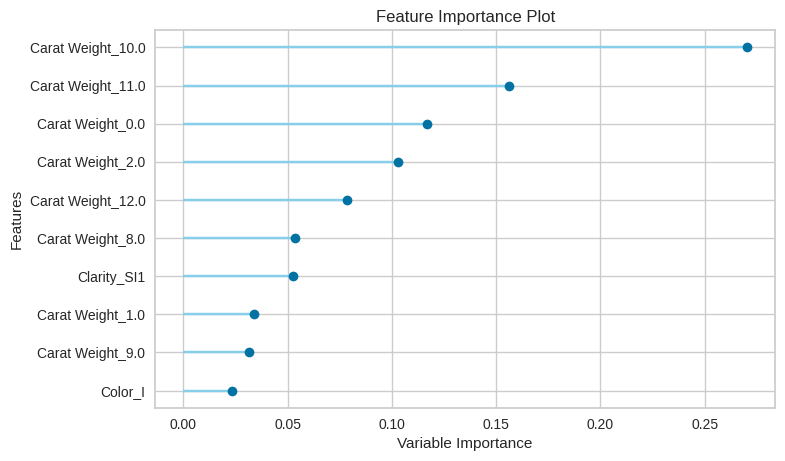

In [ ]:
#plot으로 어떤 컬럼이 주요하게 미치는 영향도를 시각화로 볼 수 있다.
#중요도가 차례대로 나온 것을 볼 수 있다. 
plot_model(dt, plot='feature')

### 섀플리 분석 SHAP(SHapley Additive exPlanations)

- 게임 이론에서 처음 등장하였으며, 머신러닝 모델을 분석하기 시작하면서 다시 주목받고 있음
- 섀플리 값 (SHAP Value)는 각각의 데이터가 종속변수 (Y)에 미치는 영향도를 계산한 값 (기여도를 수치화)

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 14.6 MB/s 


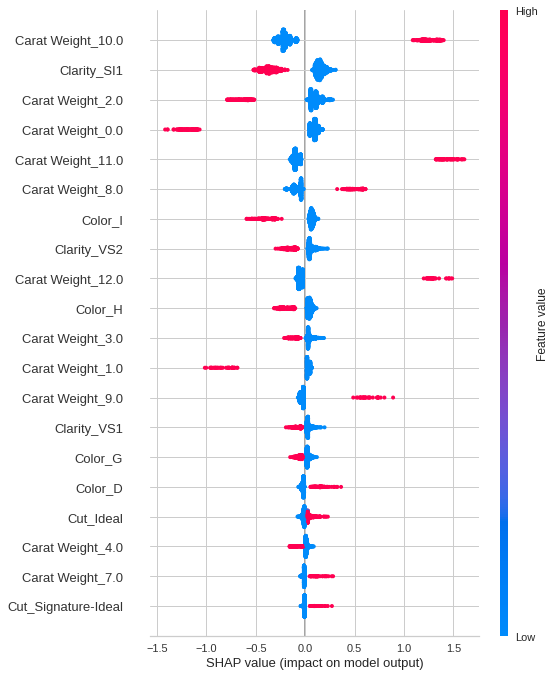

In [ ]:
interpret_model(dt)
#결과 -> carat weight가 10대가 아닌 것은 낮았다. 
      -> 다이아몬드가 무거워질수록 가격이 올라간 것을 볼 수 있었다. 
#간단한 회귀예측을 해보았다. 